In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/food_truck_data.csv', header=None)

In [3]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X = list(df[0])
Y = list(df[1])

In [18]:
def plot_line(x, y, color="blue"):
    plt.xlabel('population')
    plt.ylabel('profit')
    plt.plot(x,y,color)
    plt.show()

In [7]:
x_sum, y_sum, xy_sum, x2_sum, y2_sum = 0, 0, 0, 0, 0
n = len(X)

for x,y in zip(X,Y):
    x_sum += x
    y_sum += y
    xy_sum += (x*y)
    x2_sum += x ** 2
    y2_sum += y ** 2

x_mean = x_sum/n
y_mean = y_sum/n

In [9]:
x_std, y_std = 0, 0 #standard deviations

for x,y in zip(X,Y):
    x_std += (x - x_mean) ** 2
    y_std += (y - y_mean) ** 2

x_std = (x_std/n) ** 0.5
y_std = (y_std/n) ** 0.5

In [10]:
#coeff of regression
r = xy_sum/(x2_sum*y2_sum)

In [12]:
#slope
m = r * (x_std/y_std)

In [13]:
#intercept
c = y_mean - (m*x_mean)

In [16]:
#make a prediction
y_pred = []

for x in X:
    y_pred.append(m*x + c) #Y = mX + c

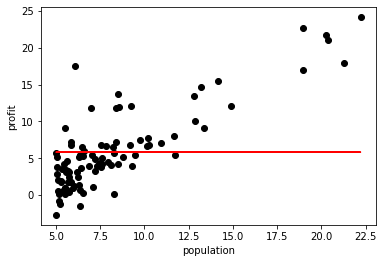

In [21]:
plt.scatter(X,Y, color="black")
plot_line(X, y_pred, color="red")

### Training a model to find best fit line

In [22]:
#Gradient descent algo
def gradient_descent(X, Y, m, c, alpha):
    '''
    desc: Gradient step function
    X, Y : data points
    m : slope
    c : intercept
    alpha : learning rate
    '''
    y_pred = []
    for x in X:
        y_pred.append(m*x + c)
    
    m_grad = 0
    c_grad = 0
    #calculate gradients
    for i, (x, y) in enumerate(zip(X,Y)):
        m_grad += -(2 / n) * x * (y - y_pred[i])
        c_grad += -(2 / n) * (y - y_pred[i])
    
    #update slope and intercept
    m -= (alpha * m_grad)
    c -= (alpha * c_grad)
    
    return m, c, y_pred

In [23]:
#Train a learner to calc best fit line
def train_to_fit(X, Y, m, c, alpha, iterr=50):
    preds = []
    for _ in range(iterr):
        m, c, preds = gradient_descent(X, Y, m, c, alpha)
    
    return preds

In [29]:
#training setup
lr = 0.001 #learning rate
maxiterr = 10000

In [30]:
y_pred = train_to_fit(X, Y, m, c, alpha=lr, iterr=maxiterr)

In [31]:
y_pred[:10]

[3.4961492644816228,
 2.816837121703998,
 6.305426901638063,
 4.537862304857132,
 3.2041990080646596,
 6.1471462392498,
 5.089803420863953,
 6.3748277816093335,
 3.9348328099807044,
 2.265012645831582]

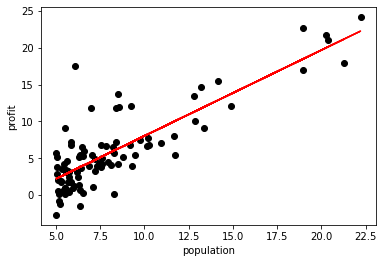

In [32]:
plt.scatter(X,Y, color="black")
plot_line(X, y_pred, color="red")

In [33]:
def evaluate_fit(y, y_mean, y_pred, n):
    '''
    desc : function eto valuate the line fit by
        calculating the coeff of determination
    '''
    sse  = 0 #sum of squared errors
    ssr = 0 #sum of squared residuals
    sst = 0 #sum of squared total S.S.T = S.S.R + S.S.E
    r_sq = 0 #r^2 or coeff of determination
    
    for i in range(n):
        sse += (y[i] - y_pred[i]) ** 2
        ssr += (y[i] - y_mean) ** 2
    
    sst = sse + ssr
    
    r_sq = 1 - (sse / sst)
    
    return sse, ssr, sst, r_sq

In [34]:
#Evaluation of fit: calculate R^2 value
_, _, _, r2_val = evaluate_fit(Y, y_mean, y_pred, n)
print(f"Coeff of determination is {r2_val} or {r2_val * 100}%")

Coeff of determination is 0.7701820750195986 or 77.01820750195985%
